<a href="https://colab.research.google.com/github/sreeyadora/college/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("sales_dataset.csv")
print(data.head())

      TV  RADIO  NEWSPAPER  SALES
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [61]:
print(data.isnull().sum())

TV           0
RADIO        0
NEWSPAPER    0
SALES        0
dtype: int64


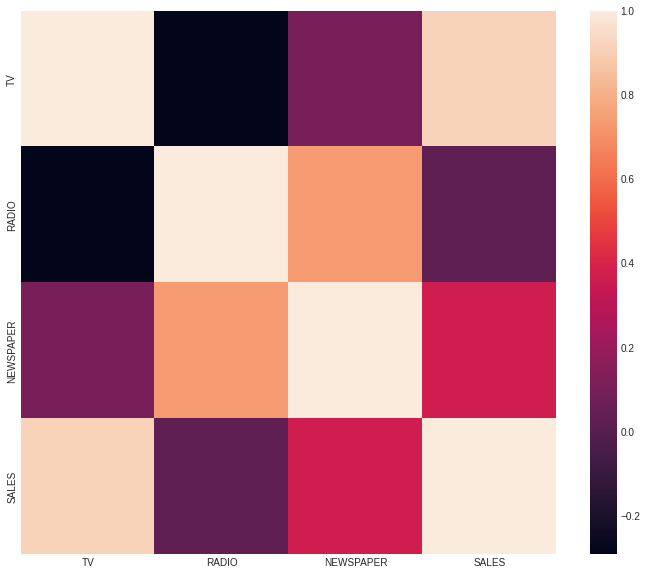

In [62]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

In [63]:
x = np.array(data.drop(["SALES"], 1))
y = np.array(data.drop(["SALES"],1))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)



<ipython-input-63-061486b28699>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop(["SALES"], 1))
<ipython-input-63-061486b28699>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  y = np.array(data.drop(["SALES"],1))


In [64]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [65]:
ypred = model.predict(xtest)

data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(data)

   Predicted Sales
0              8.6
1              2.1
2              1.0
3             44.5
4             39.3
5             45.1


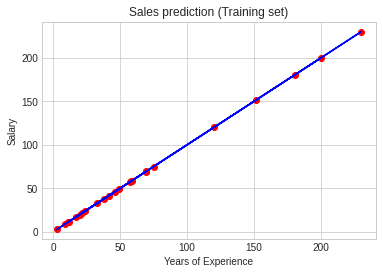

In [66]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,model.predict(xtrain),color='blue')
plt.title('Sales prediction (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

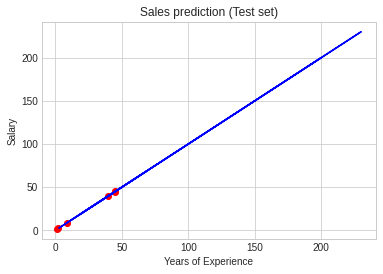

In [67]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtrain,model.predict(xtrain),color='blue')
plt.title('Sales prediction (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print("R^2 : ", r2_score(ytest, y_pred))
    print("MAE :", mean_absolute_error(ytest,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(ytest, y_pred)))
     

from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

R^2 :  1.0
MAE : 1.376676550535194e-13
RMSE: 2.131492509035832e-13
